In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from model import LinearRegression


# Boston Housing Price Dataset 

In [2]:
boston_housing_data = datasets.load_boston()
bostone_housing_df = pd.DataFrame(boston_housing_data.data, columns = boston_housing_data.feature_names)
bostone_housing_df['target'] = boston_housing_data.target
bostone_housing_df


c:\Users\Tran Nguyen Nhut Duy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Preprocessing Data

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

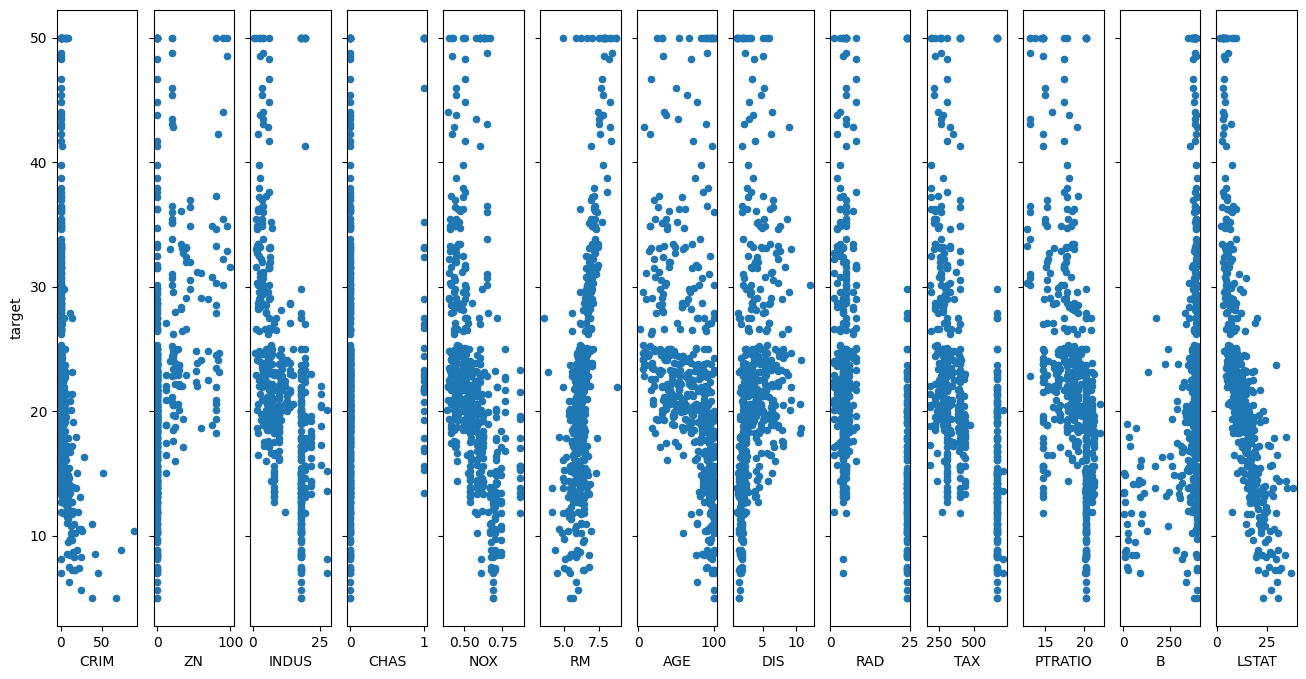

In [3]:
# plot the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 13, sharey=True)
bostone_housing_df.plot(kind='scatter', x='CRIM', y='target', ax=axs[0], figsize=(16, 8))
bostone_housing_df.plot(kind='scatter', x='ZN', y='target', ax=axs[1])
bostone_housing_df.plot(kind='scatter', x='INDUS', y='target', ax=axs[2])
bostone_housing_df.plot(kind='scatter', x='CHAS', y='target', ax=axs[3])
bostone_housing_df.plot(kind='scatter', x='NOX', y='target', ax=axs[4])
bostone_housing_df.plot(kind='scatter', x='RM', y='target', ax=axs[5])
bostone_housing_df.plot(kind='scatter', x='AGE', y='target', ax=axs[6])
bostone_housing_df.plot(kind='scatter', x='DIS', y='target', ax=axs[7])
bostone_housing_df.plot(kind='scatter', x='RAD', y='target', ax=axs[8])
bostone_housing_df.plot(kind='scatter', x='TAX', y='target', ax=axs[9])
bostone_housing_df.plot(kind='scatter', x='PTRATIO', y='target', ax=axs[10])
bostone_housing_df.plot(kind='scatter', x='B', y='target', ax=axs[11])
bostone_housing_df.plot(kind='scatter', x='LSTAT', y='target', ax=axs[12])


In [4]:
# convert to tensor, select LSTAT and RM as features
X = torch.tensor(bostone_housing_df[['LSTAT', 'RM']].values, dtype=torch.float32)
y = torch.tensor(bostone_housing_df['target'].values, dtype=torch.float32)

print(X.shape)
print(y.shape)

torch.Size([506, 2])
torch.Size([506])


In [5]:
#  normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [6]:
# add bias
X = torch.cat([torch.ones(len(X), 1), X], dim = 1)

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
#TEST_SIZE = 0.1
TRAIN_SAMPLES = int(TRAIN_SIZE * X.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * X.shape[0])

X_train, y_train = X[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


torch.Size([354, 3]) torch.Size([101, 3]) torch.Size([51, 3])
torch.Size([354]) torch.Size([101]) torch.Size([51])


In [7]:
print(X_train.mean(dim = 0))

tensor([ 1.0000, -0.3197,  0.1697])


## Training

In [8]:
n_features = X_train.shape[1]

### Batch_size = 1, learning_rate = 1e-4, MAE

In [9]:
batch_size = 1
learning_rate = 1e-4
n_iters = 500
LinearRegressionModel = LinearRegression(n_features, batch_size = batch_size, loss_type = "mae")
history = LinearRegressionModel.fit(X_train, y_train, X_val, y_val, n_iters, learning_rate)


Epoch: 10, loss: 29.090375900268555, loss_val: 14.973749160766602
Epoch: 20, loss: 28.56918716430664, loss_val: 14.755718231201172
Epoch: 30, loss: 28.047996520996094, loss_val: 14.537686347961426
Epoch: 40, loss: 27.526805877685547, loss_val: 14.319655418395996
Epoch: 50, loss: 27.00587272644043, loss_val: 14.101874351501465
Epoch: 60, loss: 26.485109329223633, loss_val: 13.884262084960938
Epoch: 70, loss: 25.964345932006836, loss_val: 13.666648864746094
Epoch: 80, loss: 25.44358253479004, loss_val: 13.449033737182617
Epoch: 90, loss: 24.922819137573242, loss_val: 13.231419563293457
Epoch: 100, loss: 24.402057647705078, loss_val: 13.013806343078613
Epoch: 110, loss: 23.88050079345703, loss_val: 12.795388221740723
Epoch: 120, loss: 23.358898162841797, loss_val: 12.576926231384277
Epoch: 130, loss: 22.837295532226562, loss_val: 12.358465194702148
Epoch: 140, loss: 22.31568717956543, loss_val: 12.140006065368652
Epoch: 150, loss: 21.794078826904297, loss_val: 11.921548843383789
Epoch: 16

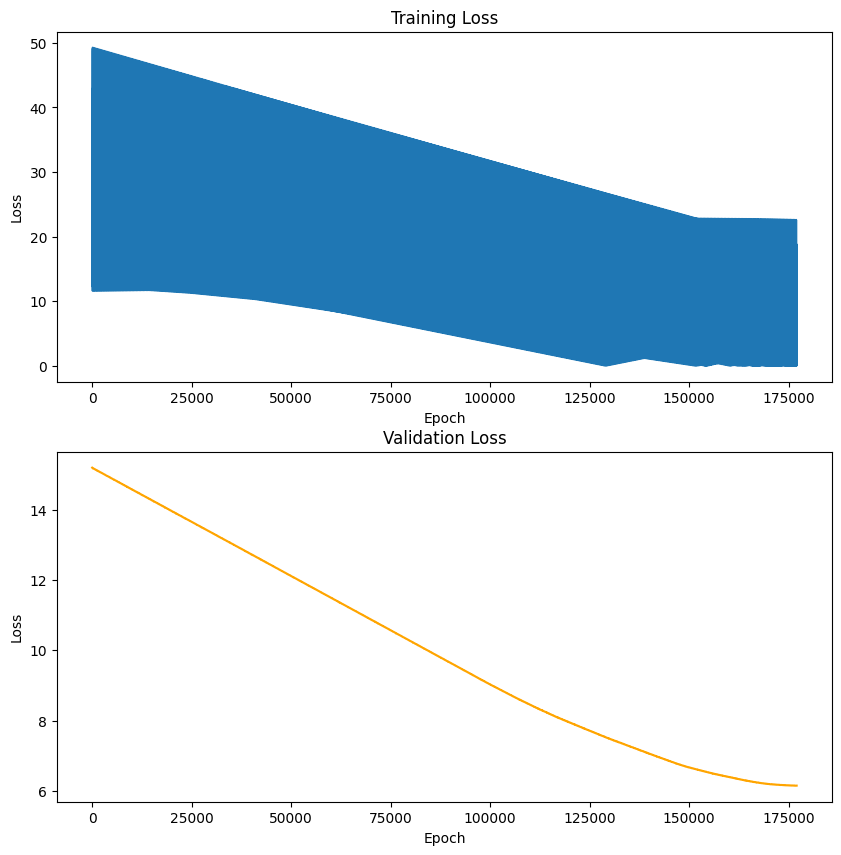

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history["losses_train"])
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(history['losses_val'], 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()

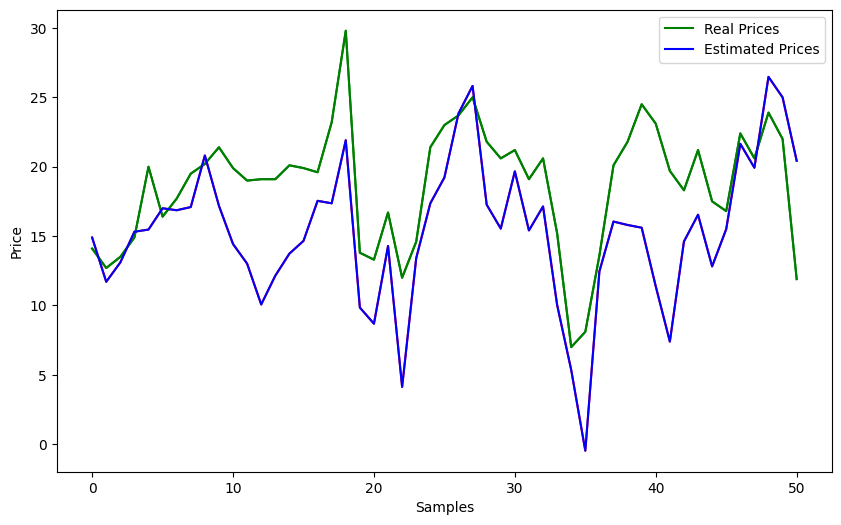

In [11]:
estimated_prices = []

for feature in X_test: 
    estimated_price = sum(c*x for x, c in zip(feature, LinearRegressionModel.theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y_test, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y_test, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

### Batch_size = 32, learning_rate = 1e-3, MAE

In [12]:
batch_size = 32
n_iters = 1800
learning_rate = 1e-3
LinearRegressionModel = LinearRegression(n_features, batch_size = batch_size, loss_type = "mae")
history = LinearRegressionModel.fit(X_train, y_train, X_val, y_val, n_iters, learning_rate)

Epoch: 10, loss: 24.26230239868164, loss_val: 15.354780197143555
Epoch: 20, loss: 24.101703643798828, loss_val: 15.285632133483887
Epoch: 30, loss: 23.94110107421875, loss_val: 15.216487884521484
Epoch: 40, loss: 23.780498504638672, loss_val: 15.147339820861816
Epoch: 50, loss: 23.619897842407227, loss_val: 15.078195571899414
Epoch: 60, loss: 23.45929718017578, loss_val: 15.009047508239746
Epoch: 70, loss: 23.298696517944336, loss_val: 14.939902305603027
Epoch: 80, loss: 23.138092041015625, loss_val: 14.870753288269043
Epoch: 90, loss: 22.97748374938965, loss_val: 14.801600456237793
Epoch: 100, loss: 22.816875457763672, loss_val: 14.73244571685791
Epoch: 110, loss: 22.656269073486328, loss_val: 14.663293838500977
Epoch: 120, loss: 22.49566078186035, loss_val: 14.594138145446777
Epoch: 130, loss: 22.335052490234375, loss_val: 14.524984359741211
Epoch: 140, loss: 22.17444610595703, loss_val: 14.455831527709961
Epoch: 150, loss: 22.013835906982422, loss_val: 14.386677742004395
Epoch: 160,

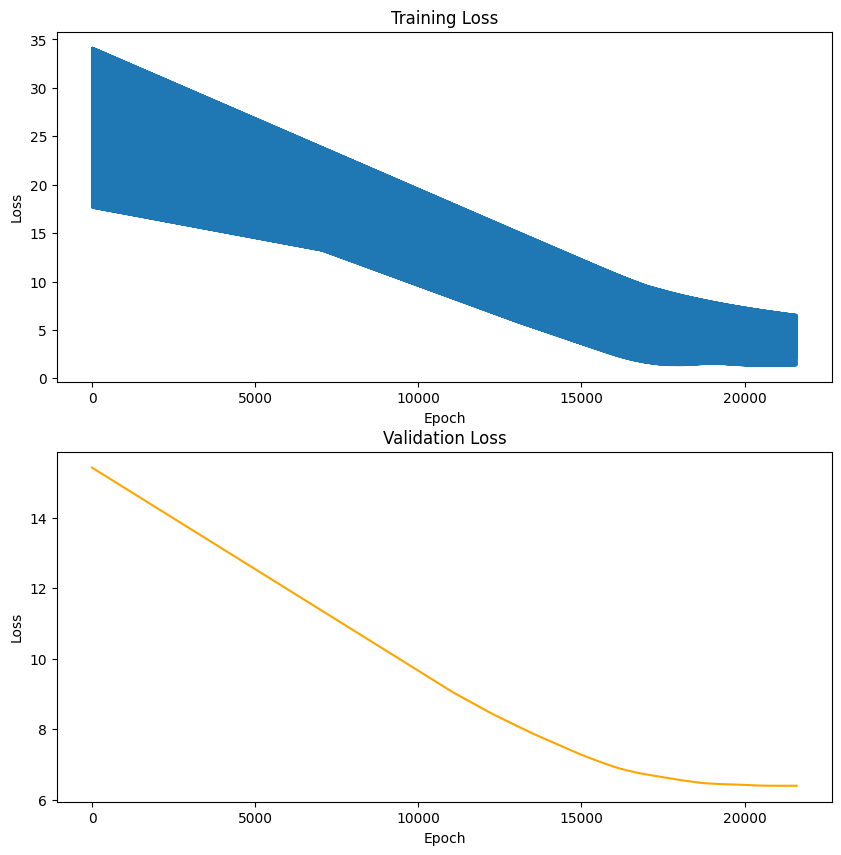

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history["losses_train"])
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(history['losses_val'], 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()

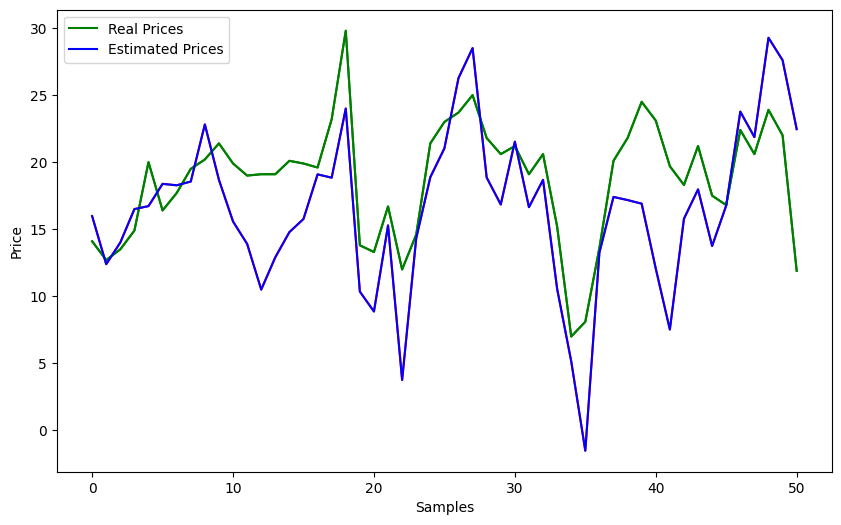

In [14]:
estimated_prices = []

for feature in X_test: 
    estimated_price = sum(c*x for x, c in zip(feature, LinearRegressionModel.theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y_test, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y_test, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

### Batch_size = n_sample, learning_rate = 0.00001, MSE

In [15]:
batch_size = len(X_train)
learning_rate = 1e-3
n_iters = 16000
LinearRegressionModel = LinearRegression(n_features, batch_size = batch_size, loss_type = "mae")
history = LinearRegressionModel.fit(X_train, y_train, X_val, y_val, n_iters, learning_rate)

Epoch: 10, loss: 24.253454208374023, loss_val: 14.379395484924316
Epoch: 20, loss: 24.242143630981445, loss_val: 14.373237609863281
Epoch: 30, loss: 24.230833053588867, loss_val: 14.367080688476562
Epoch: 40, loss: 24.219524383544922, loss_val: 14.360922813415527
Epoch: 50, loss: 24.208213806152344, loss_val: 14.354763984680176
Epoch: 60, loss: 24.1969051361084, loss_val: 14.34860897064209
Epoch: 70, loss: 24.185590744018555, loss_val: 14.342451095581055
Epoch: 80, loss: 24.174283981323242, loss_val: 14.33629322052002
Epoch: 90, loss: 24.162975311279297, loss_val: 14.330133438110352
Epoch: 100, loss: 24.15166473388672, loss_val: 14.32397747039795
Epoch: 110, loss: 24.14035415649414, loss_val: 14.317817687988281
Epoch: 120, loss: 24.129043579101562, loss_val: 14.311659812927246
Epoch: 130, loss: 24.117733001708984, loss_val: 14.305501937866211
Epoch: 140, loss: 24.106422424316406, loss_val: 14.29934310913086
Epoch: 150, loss: 24.095111846923828, loss_val: 14.293185234069824
Epoch: 160, 

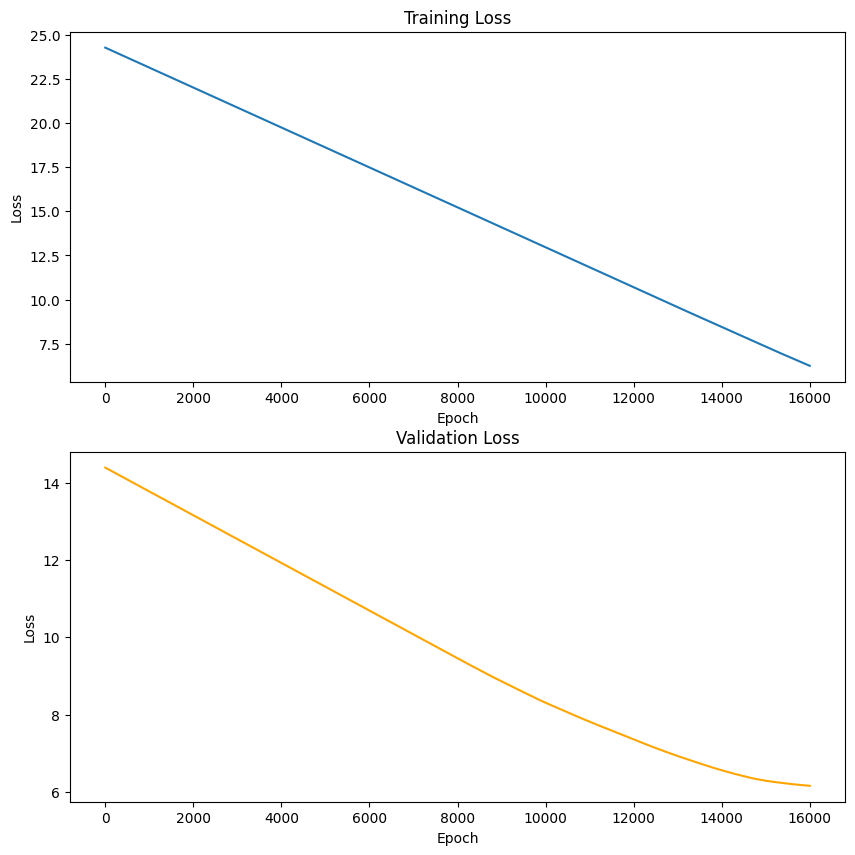

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history["losses_train"])
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(history['losses_val'], 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()

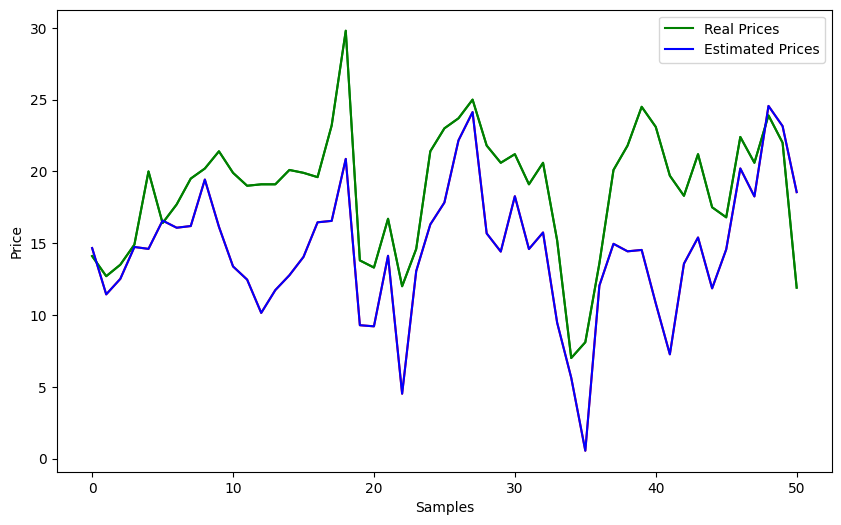

In [17]:
estimated_prices = []

for feature in X_test: 
    estimated_price = sum(c*x for x, c in zip(feature, LinearRegressionModel.theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y_test, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y_test, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()